<a href="https://colab.research.google.com/github/Akif-Mufti/Deep-learning-2.0/blob/master/Linear_regression2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#to install ngrok application to google colab notebook
!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
!unzip ngrok-stable-linux-amd64.zip

--2019-11-06 02:47:20--  https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
Resolving bin.equinox.io (bin.equinox.io)... 3.212.234.252, 34.202.125.55, 52.203.61.249, ...
Connecting to bin.equinox.io (bin.equinox.io)|3.212.234.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13773305 (13M) [application/octet-stream]
Saving to: ‘ngrok-stable-linux-amd64.zip’

ngrok-stable-linux- 100%[===================>]  13.13M  14.2MB/s    in 0.9s    

2019-11-06 02:47:21 (14.2 MB/s) - ‘ngrok-stable-linux-amd64.zip’ saved [13773305/13773305]

Archive:  ngrok-stable-linux-amd64.zip
  inflating: ngrok                   


In [0]:
#to run tensorboar in the background
LOG_DIR = './log'
get_ipython().system_raw(
    'tensorboard --logdir {} --host 0.0.0.0 --port 6006 &'
    .format(LOG_DIR)
)

In [0]:
#we can run ngrok to tunnel TensorBoard port 6006 to the outside world.
get_ipython().system_raw('./ngrok http 6006 &')

In [4]:
#public URL where we can access the colab TensorBoard web page.
! curl -s http://localhost:4040/api/tunnels | python3 -c \
    "import sys, json; print(json.load(sys.stdin)['tunnels'][0]['public_url'])"


https://02b09c64.ngrok.io


In [5]:
import numpy  as np
import tensorflow as tf
import matplotlib.pyplot as plt 

In [0]:
learning_rate =0.01
epochs =300

In [0]:
sample_points = 50
x_train = np.linspace(0,30,sample_points)
y_train = 6*x_train + 7*np.random.rand(sample_points)

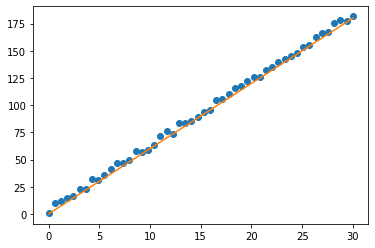

In [8]:
#ploting noisy dataset

plt.plot(x_train,y_train,'o')
#noise free dat
plt.plot(x_train,6*x_train)

plt.show()



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epochs 0.000000 cost 0.266181 Weight 5.855720 Bias 0.904325
Epochs 40.000000 cost 0.027722 Weight 6.074704 Bias 1.159086
Epochs 80.000000 cost 0.026622 Weight 6.066360 Bias 1.376009
Epochs 120.000000 cost 0.025645 Weight 6.058805 Bias 1.572438
Epochs 160.000000 cost 0.024777 Weight 6.051965 Bias 1.750308
Epochs 200.000000 cost 0.024003 Weight 6.045770 Bias 1.911373
Epochs 240.000000 cost 0.023313 Weight 6.040161 Bias 2.057224
Epochs 280.000000 cost 0.022697 Weight 6.035082 Bias 2.189294


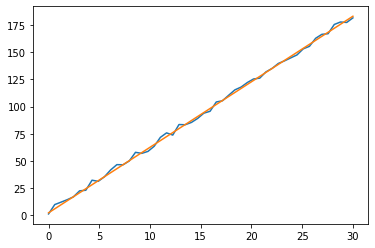

In [9]:
#declaring the placholders and variables
Y = tf.placeholder(tf.float32)
X= tf.placeholder(tf.float32)

W = tf.Variable(np.random.rand(), name = 'Weights')
B = tf.Variable(np.random.rand(), name = 'Biases')

#creating the model for regression
with tf.name_scope("model") as scope:
  prediction = W*X +B

#summaries to study the behavior of weights and biases with epochs

weight_histogram = tf.summary.histogram("Weights",W)
Bias_histogram = tf.summary.histogram("Biases",B)

#cost function
with tf.name_scope("Cost_function") as scope:
  cost_iteration = tf.reduce_sum((prediction-Y)**2)/(2*sample_points)

#record the scalar summary of the cost function
cost_summary = tf.summary.scalar("Cost",cost_iteration)

#optimizer 
with tf.name_scope("Optimizer") as scope:
  optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost_iteration)

#initializing the variables
init = tf.global_variables_initializer()

#merge all summaries 

merge_summary = tf.summary.merge_all()

#tensor flow sessions

with tf.Session() as sess:
  sess.run(init)
  writer = tf.summary.FileWriter('./log',sess.graph)
  for epoch in range(epochs):
    for x, y in zip(x_train,y_train):
      sess.run(optimizer, feed_dict = {X:x, Y:y})

      #write logs for each epochs
      summary_epochs = sess.run(merge_summary, feed_dict = {X:x, Y:y})
      writer.add_summary(summary_epochs,epoch)

    if not epoch%40:
      W1 = sess.run(W)
      B1 = sess.run(B)
      cost_iter = sess.run(cost_iteration, feed_dict = {X:x,Y:y})
      print('Epochs %f cost %f Weight %f Bias %f' %(epoch,cost_iter,W1,B1))

  Weight = sess.run(W)
  Bias = sess.run(B)
  plt.plot(x_train,y_train)
  plt.plot(x_train,Weight*x_train + Bias)
  plt.show()

